In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [2]:
df = pd.read_csv('housing-data.csv')

display(df.info())
display(df.head())
display(df.describe().round(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
sqft     47 non-null int64
bdrms    47 non-null int64
age      47 non-null int64
price    47 non-null int64
dtypes: int64(4)
memory usage: 1.5 KB


None

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


,sqft,bdrms,age,price
count,47.00,47.00,47.00,47.00
mean,2000.68,3.17,42.74,340412.66
std,794.70,0.76,22.87,125039.90
min,852.00,1.00,5.00,169900.00
25%,1432.00,3.00,24.50,249900.00
50%,1888.00,3.00,44.00,299900.00
75%,2269.00,4.00,61.50,384450.00
max,4478.00,5.00,79.00,699900.00


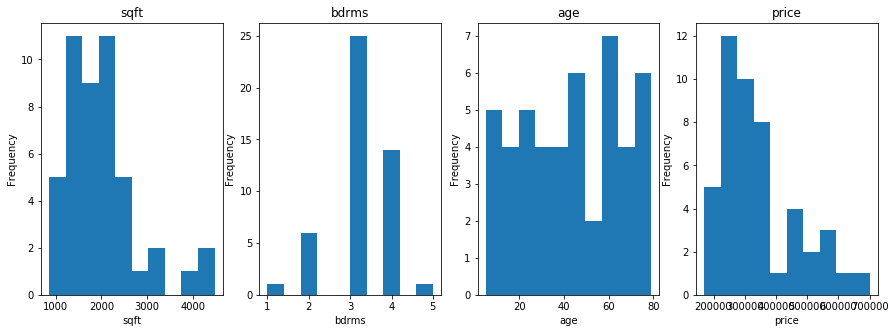

In [3]:
# plot the histograms for each feature
plt.figure(figsize=(15, 5))
for i, feature in enumerate(df.columns):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

#### Feature Engineering

In [4]:
df['sqft1000'] = df['sqft']/1000.0
df['age10'] = df['age']/10.0

df['price100k'] = df['price']/1e5

display(df.describe().round(2))

,sqft,bdrms,age,price,sqft1000,age10,price100k
count,47.00,47.00,47.00,47.00,47.00,47.00,47.00
mean,2000.68,3.17,42.74,340412.66,2.00,4.27,3.40
std,794.70,0.76,22.87,125039.90,0.79,2.29,1.25
min,852.00,1.00,5.00,169900.00,0.85,0.50,1.70
25%,1432.00,3.00,24.50,249900.00,1.43,2.45,2.50
50%,1888.00,3.00,44.00,299900.00,1.89,4.40,3.00
75%,2269.00,4.00,61.50,384450.00,2.27,6.15,3.84
max,4478.00,5.00,79.00,699900.00,4.48,7.90,7.00


#### Train/Test split

In [5]:
X = df[['sqft1000', 'bdrms', 'age10']].values
y = df['price100k'].values

display(X.shape)
display(y.shape)

(47, 3)

(47,)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

#### model

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

model = Sequential()

model.add(Dense(1, input_shape=(3,)))

model.compile(Adam(lr=0.1), 'mean_squared_error')

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Train
history = model.fit(
    X_train, y_train,
    epochs=40, verbose=0)

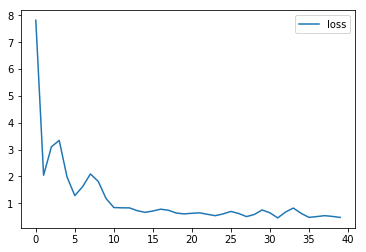

In [9]:
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.plot();

#### Evaluate

In [10]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error as mse

print("The Mean Squared Error on the Train set is:\t{:0.5f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.5f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	0.43576
The Mean Squared Error on the Test set is:	0.63152


In [12]:
from sklearn.metrics import r2_score

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.726
The R2 score on the Test set is:	0.512


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. The would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [13]:
df = pd.read_csv('HR_comma_sep.csv')

display(df.info())
display(df.head())
display(df.describe().round(2))

display(df['left'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


None

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


0    11428
1     3571
Name: left, dtype: int64

#### Baseline model
Establish a benchmark: what would be your accuracy score if you predicted everyone stay?

In [14]:
df.left.value_counts() / len(df)

0    0.761917
1    0.238083
Name: left, dtype: float64

--> Predict all 0 accuracy = 76.19%

--> Accuracy must >> 76%

#### Feature Engineering

In [15]:
df['average_montly_hours_100'] = df['average_montly_hours']/100.0

In [16]:
cat_features = pd.get_dummies(df[['sales', 'salary']])

#### Train/Test split

In [17]:
display(df.columns)
display(cat_features.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'average_montly_hours_100'],
      dtype='object')

Index(['sales_IT', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [18]:
X = pd.concat([df[['satisfaction_level', 'last_evaluation', 'number_project',
                   'time_spend_company', 'Work_accident',
                   'promotion_last_5years', 'average_montly_hours_100']],
                   cat_features], axis=1).values
y = df['left'].values

display(X.shape)
display(y.shape)

(14999, 20)

(14999,)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

#### Model

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

model = Sequential()

model.add(Dense(1, input_shape=(20,), activation='sigmoid'))

model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Train
history = model.fit(
    X_train, y_train,
    epochs=40, verbose=0)

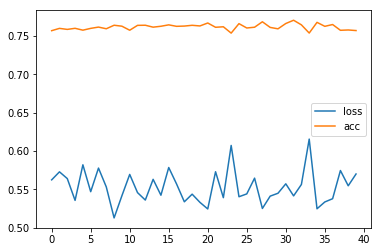

In [22]:
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.plot();

#### Evaluate

In [23]:
y_test_pred = model.predict_classes(X_test)

In [24]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

pretty_confusion_matrix(y_test, y_test_pred, labels=['Stay', 'Leave'])

,Predicted Stay,Predicted Leave
Stay,2136,161
Leave,458,245


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The test Accuracy score is {:0.3f}".format(accuracy_score(y_test, y_test_pred)))
print("The test Precision score is {:0.3f}".format(precision_score(y_test, y_test_pred)))
print("The test Recall score is {:0.3f}".format(recall_score(y_test, y_test_pred)))
print("The test F1 score is {:0.3f}".format(f1_score(y_test, y_test_pred)))

# Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

The test Accuracy score is 0.794
The test Precision score is 0.603
The test Recall score is 0.349
The test F1 score is 0.442
             precision    recall  f1-score   support

          0       0.82      0.93      0.87      2297
          1       0.60      0.35      0.44       703

avg / total       0.77      0.79      0.77      3000



--> the model is not good enough since it performs no better than the benchmark.

#### Cross Validation Trainning

In [26]:
from keras.wrappers.scikit_learn import KerasClassifier

def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
    return model

In [27]:
model = KerasClassifier(
    build_fn=build_logistic_regression_model,
    epochs=25, verbose=0)

In [28]:
from sklearn.model_selection import KFold, cross_val_score

scores = cross_val_score(
    model,
    X, y,
    cv=KFold(5, shuffle=True))

display(scores)
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

array([0.789     , 0.77866667, 0.75466667, 0.73233333, 0.77259086])

The cross validation accuracy is 0.7655 ± 0.0200


--> the model is not good enough since it performs no better than the benchmark.